## Assignment 3
## Alex Masciotra
### 260746829


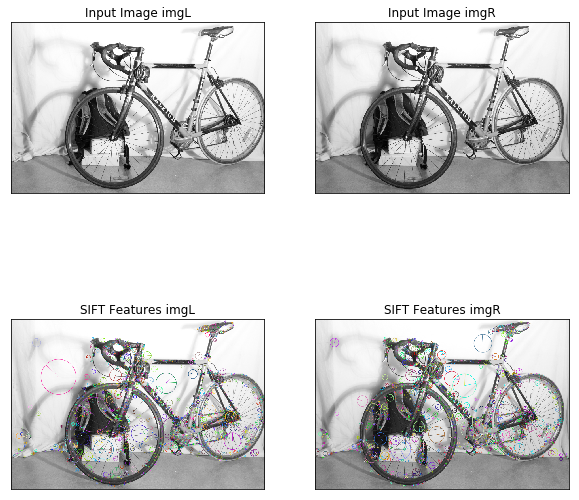

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#1 Sift Keypoints

#Load images
img_L = "./im0.png"
img_R = "./im1.png"

imgL = cv2.imread(img_L)
imgR = cv2.imread(img_R)

# resize images for fast processing
imgL = cv2.resize(imgL, None, fx=0.3, fy=0.3)
imgR = cv2.resize(imgR, None, fx=0.3, fy=0.3)

#convert all to gray
imgL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
imgR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
#to display sift points
imgL_sift = cv2.cvtColor(imgL, cv2.COLOR_GRAY2RGB)
imgR_sift = cv2.cvtColor(imgR, cv2.COLOR_GRAY2RGB)

#create copies of images for later
imgL_copy = imgL.copy()
imgR_copy = imgR.copy()

# #convert all to RGB
# imgL = cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB)
# imgR = cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB)


# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

#get sift features for imgL and imgR
keypoints1, descriptors1 = sift.detectAndCompute(imgL, None)
keypoints2, descriptors2 = sift.detectAndCompute(imgR, None)

#draw keypoints where we display copied image
cv2.drawKeypoints(imgL, keypoints1, imgL_sift, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(imgR, keypoints2, imgR_sift, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



# display
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(imgL, cmap = "gray")
plt.title("Input Image imgL"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(imgR, cmap = "gray")
plt.title("Input Image imgR"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(imgL_sift)
plt.title("SIFT Features imgL"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(imgR_sift)
plt.title("SIFT Features imgR"), plt.xticks([]), plt.yticks([])

plt.show()





In [2]:
#now draw best 20 matches


# create BFMatcher object (bruteforce matcher using default arguments
bf = cv2.BFMatcher()

# Match descriptors.
matches = bf.match(descriptors1,descriptors2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw best 20 matches since they are sorted from above
matchedimg = cv2.drawMatches(imgL,keypoints1,imgR,keypoints2,matches[:20],imgL, flags=2)




plt.figure(figsize=(20,20))
plt.imshow(matchedimg)
plt.title("Matched keypoints"), plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'Matched keypoints'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

In [3]:

""" drawlines """
def drawlines(img1, img2, lines, pts1, pts2):
    """
    Draw epilines. Epilines corresponding to the points in 
    the first image are drawn on the second image.
    :param img1: image on which we draw the epilines for the points
            in img2
    :param lines: corresponding epilines
    """
    # img1 shape
    row, col = img1.shape
    # convert from grayscale to BGR
    img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    # for each line
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        # pick a random color
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [col, -(r[2]+r[0]*col)/r[1]])
        # draw the lines and the points
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color, 1)
        img1 = cv2.circle(img1, tuple(pt1), 5, color, -1)
        img2 = cv2.circle(img2, tuple(pt2), 5, color, -1)
    return img1, img2

In [4]:

# match descriptors (find the best two matches for each descriptor)
matches2 = bf.knnMatch(descriptors1, descriptors2, k=2)

# ratio test - store the list of best matches from both images
good = []
ptsL = []
ptsR = []
for i, (m, n) in enumerate(matches2):
    if m.distance < 0.6 * n.distance:
        good.append(m)
        ptsR.append(keypoints2[m.trainIdx].pt)
        ptsL.append(keypoints1[m.queryIdx].pt)

# find the Fundamental Matrix
ptsL = np.int32(ptsL)
ptsR = np.int32(ptsR)
F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_LMEDS)

# Use only inliers for remaining computations
ptsL = ptsL[mask.ravel()==1]
ptsR = ptsR[mask.ravel()==1]

# find epilines
# Epilines corresponding to points in the first image is drawn on the
# second image
linesL = cv2.computeCorrespondEpilines(ptsR, 2, F)
linesL = linesL.reshape(-1, 3)
# draw lines
imgL1, imgR1 = drawlines(imgL, imgR, linesL, ptsL, ptsR)

linesR = cv2.computeCorrespondEpilines(ptsL, 1, F)
linesR = linesR.reshape(-1, 3)
# draw lines
imgR2, imgL2 = drawlines(imgR, imgL, linesR, ptsR, ptsL)

# display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(imgL1, cmap="gray")
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgR1, cmap="gray")
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(imgL2, cmap="gray")
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgR2, cmap="gray")
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.show()


[230 424]
[[148 171 165 215 210]
 [120 146 156 218 217]
 [110 161 189 243 227]
 [ 68 124 168 194 213]
 [ 54  72 128 171 197]]


<function matplotlib.pyplot.show(*args, **kw)>

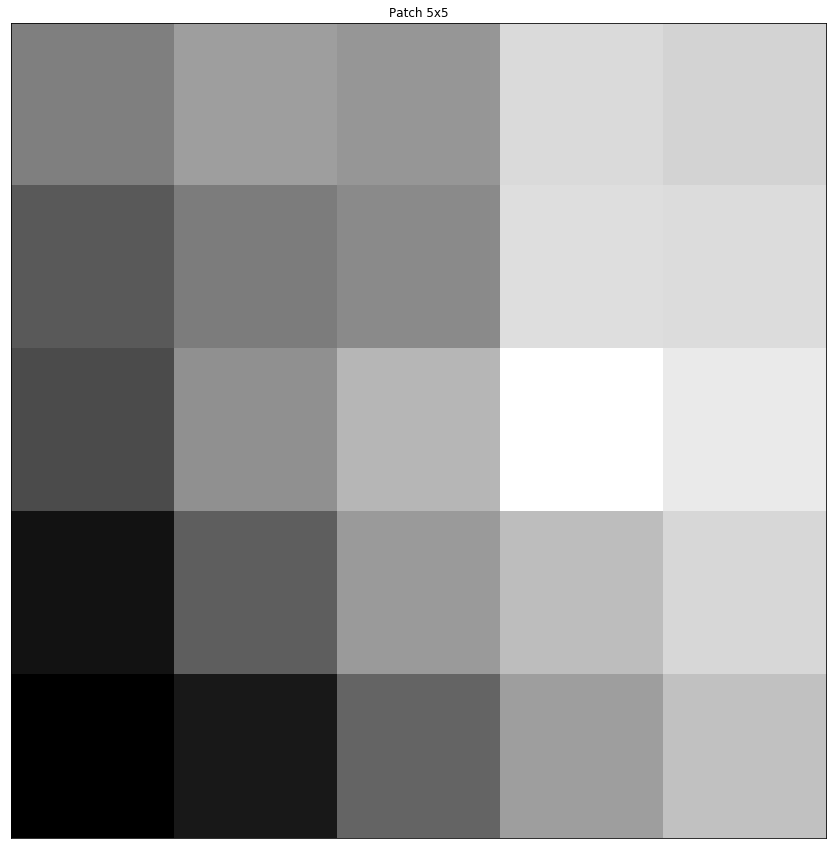

In [5]:
#find points in right image that doesnt match left image

#apply similar ratio test as above, except stricter

# ratio test - store the list of best matches from both images
badptsL = []
badptsR = []
for i, (m, n) in enumerate(matches2):
    if m.distance < 0.15 * n.distance and m.distance > 0.2:
        badptsR.append(keypoints2[m.trainIdx].pt)
        badptsL.append(keypoints1[m.queryIdx].pt)

#check bad points and plot the best result
badpoint = np.array(badptsR[5]).astype(int)
print(badpoint)

#taking points around "badpoint" 5by 5
patch5by5 = imgR[badpoint[0] - 2 : badpoint[0] + 3, badpoint[1] - 2 : badpoint[1] + 3] 

print(patch5by5)

plt.figure(figsize = (15,15))
plt.imshow(patch5by5, cmap = "gray")
plt.title("Patch 5x5"), plt.xticks([]), plt.yticks([])
plt.show






In [6]:
#match patch using SSD on left image

x = list() #store all SSDs in a list to graph

#find corresponding point on epipolar line left image at same index

left = np.array(badptsL[5]).astype(int)
print(left)
#compute ssd
for i in range(2, imgL.shape[0]- 2):
    newpoint = (i, left[1])
    newpatch = imgL[newpoint[0] - 2 : newpoint[0] + 3, newpoint[1] - 2 : newpoint[1] + 3] 
    sumx = np.sum((patch5by5 - newpatch)**2)
    x.append((sumx))
    
minimumx = min(x)
print(minimumx)


plt.plot(x)
plt.show


[254 424]
1698


<function matplotlib.pyplot.show(*args, **kw)>

(214, 424)


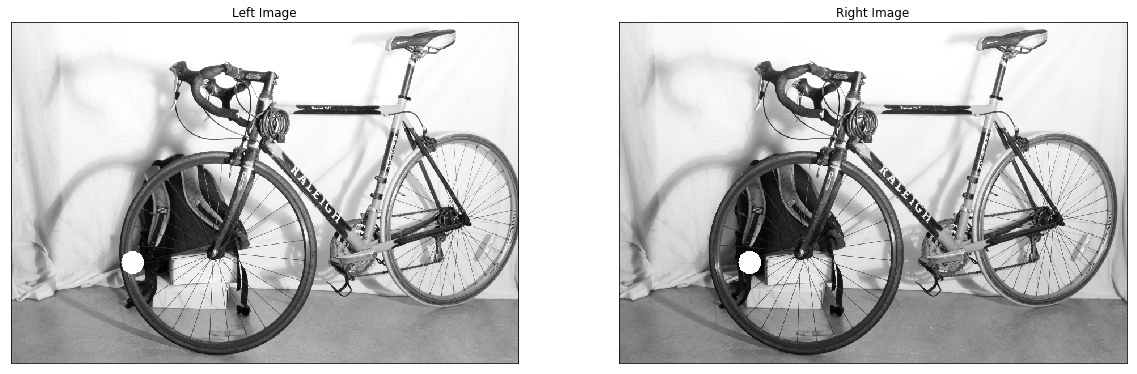

In [7]:
# copy image
imgL_min = imgL.copy()
imgR_min = imgR.copy()



#find the mininum SSD point on image
minpoint = (np.argmin(x), left[1])
print(minpoint)

# point minimum ssd out on images
imgL_min = cv2.circle(imgL_min, (minpoint[0], minpoint[1]), 20, (255, 0, 0), -1)
imgR_min = cv2.circle(imgR_min, (badpoint[0], badpoint[1]), 20, (255, 0, 0), -1)

plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(imgL_min, cmap="gray")
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgR_min, cmap="gray")
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.show()

### Did you find exactly one matching point with lowest SSD or multiple? Is the found matching point correct one? Explain why. (2 points)

There are multiple matching points with low SSDs, I illustrated the one matching point with the lowest SSD. You can see there exists many low SSDs from the plot of the SSDs, the one that was used was equal to around 214. Since there are 2 bike tires they all have similar sift features and keypoints so more matching points can be found. the 214 was the value of the index that was used from np.argmin

### Suppose you found multiple matches in the previous question. What con-straint(s) could be imposed on the matching algorithm to nd a singlematch? (1 point)

if the image is sharpened and denoised it will yield better edges which will have more distinct sift points, and so when filtering good and bad points there will be more defined good and bad points. As well the constraints on the distances can be more strict.

### Suppose you found exactly one match with the lowest SSD, but it is incor-rect one. What constraint(s) could be imposed to nd a correct match?

if the one match from the lowest SSD is incorrect, the SSD map should be checked to see if the array is in fact of the correct SSDs. Then use that SSD to find the index of the lowest SSD. Also if it is the correct SSD, the point may be an outlier in the data, and not on the image. More strict conditions when considering good and bad points must be implemented in order to find the proper SSD within the range of the image.